# Intro to Network Science

**Author: [Erika Fille Legara](http://erikalegara.site)**  
**Citation:** Legara, Erika Fille. "Intro to Network Analysis." Network Science Lectures. GitHub repository. 2020. 

<div class="alert alert-block alert-info">
For context, this notebook is accompanied by a two-session lecture (sessions 5-6) of the Network Science course under <a href="https://aim.edu/programs/degree-programs/master-science-data-science">AIM's MSc in Data Science program</a>. The first two course sessions are focused on the introduction to Complex Systems; and 3-4 focus on the intro to the science of network (conceptual and high-level approach with most discussions on use cases). This notebook is for the first set of hands-on sessions.<br/>
    
The main reference for this lecture/notebook is <a href="http://networksciencebook.comhttp://networksciencebook.com">A-L Barabasi's Network Science</a>. 
</div>

[MIT License](https://github.com/eflegara/Network-Science-Lectures/blob/master/LICENSE.md)

---


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

## 1. Graphs and DiGraphs

### 1.1. Adjacency Matrix

<img src="figure/N4L4graph.png" width="75%"> 
 
 The convention we use is if node $i \rightarrow j$, then $A_{ij}$; similary, if node $j \rightarrow i$, we are looking at $A_{ji}$. 
 
For example, for the **DiGraph** `adj_DiG`, node $1 \rightarrow 4$, but not the other way around. Thus, 

\begin{equation}
     A_{ij}=A_{14} = 1
\end{equation}
\begin{equation}
     A_{ji} = A_{41} = 0
\end{equation}

for $i=1$ and $j=4$.  

In matrix form,

\begin{equation}
A_{ij}=
  \left( {\begin{array}{cccc}
  A_{11} & A_{12} & A_{13} & A_{14}\\
  A_{21} & A_{22} & A_{23} & A_{24}\\
  A_{31} & A_{32} & A_{33} & A_{34}\\
  A_{41} & A_{42} & A_{43} & A_{44}\\
  \end{array} } \right).
\end{equation}

Therefore, for the two network representations above, Graph (`adj_G`) and DiGraph (`adj_DiG`), the matrix representation are the following.

<div class="alert alert-block alert-info">
<b>Important:</b> The indices used in the matrices start at 1, while indexing in Python starts at 0. Do remember this to avoid indexing mistakes.
</div>

In [2]:
adj_G = np.matrix([[0,1,0,1],
                   [1,0,0,1],
                   [0,0,0,1],
                   [1,1,1,0]])

adj_DiG = np.matrix([[0,1,0,1],
                     [0,0,0,0],
                     [0,0,0,0],
                     [0,1,1,0]])

In [4]:
adj_G

matrix([[0, 1, 0, 1],
        [1, 0, 0, 1],
        [0, 0, 0, 1],
        [1, 1, 1, 0]])

### 1.2. Node Degree

 <img src="figure/node_degree.png" width="60%">

The degree of a node is the total number of links connected to it. Let's first look at the *unidrected* graph `adj_G` where $A_{ij}=A_{ji}$. **Node 4** has degree $k_4 = 3$. 

From the adjacency matrix, we can obtain this number by summing across any one of the axes. That is,

In [3]:
adj_G.sum(axis=0).item(0,3)

3

or

In [4]:
adj_G.sum(axis=1).item(3,0)

3

However, for directed graphs, extra care must be taken as switching axes may produce erroneous results. In the DiGraph, for **Node 4**, $k_4^{\text{in}}=1$ while $k_4^{\text{out}}=2$.

From the numpy matrix, these can be obtained using the following scripts.

In [5]:
# in-degree
adj_DiG.sum(axis=0).item(0,3)

1

In [6]:
# out-degree
adj_DiG.sum(axis=1).item(3,0)

2

<div class="alert alert-block alert-info">
<b>Important:</b> The order and axes depend on the way you define the adjacency matrix; that is, what you define as $i$ and $j$, how you represent the rows and columns, and how you represent $i \rightarrow j$ and $i \leftarrow j$ in the matrix.
</div>

## 2. Complete Graph

A complete graph is a graph where all nodes are connected to all other nodes in the graph. That is,

\begin{equation}
A_{ij}=
  \left( {\begin{array}{cccc}
  0 & 1 & 1 & 1\\
  1 & 0 & 1 & 1\\
  1 & 1 & 0 & 1\\
  1 & 1 & 1 & 0\\
  \end{array} } \right)
\end{equation}



In [7]:
complete_G = np.matrix([[0,1,1,1],
                        [1,0,1,1],
                        [1,1,0,1],
                        [1,1,1,0]])

In a complete graph, the total number of links is $L = L_{\text{max}}$, and

\begin{equation}
L_{\text{max}}=\frac{N(N-1)}{2}.
\end{equation}

In [8]:
lmax = complete_G.sum(axis=0).sum()/2
print(lmax)

6.0


We divide the sum by 2, to avoid double counting. That is, once the link between $1,2$ is considered ($A_{12}=1$) we don't any more include $2,1$ ($A_{21}=1$).

<img src="figure/N4L6.png" width="30%"> 

The metric $L_{\text{max}}$ is relevant to appreciate how sparse most real-world networks are. That is,



| network | $N$  | $L$  | $L_{\text{max}}$ | $\left<k \right>$ |
|---|---|---|---|---|
| WWW | $325,729$ | $1.4 \times 10^6$  | $10^{12}$ |  4.51  |
|Protein | $1,870$   | $4,470$ | $10^7$ | $2.39$ |      
|Co-authorship | $70,975$  | $2 \times 10^5$ | $3 \times 10^{10}$ | $3.9$ |
|Movie Actors | $212,250$ | $6 \times 10^6$ | $1.8 \times 10^{13}$ | $28.78$ |


## 3. NetworkX Graphs

From this point forward, we use the `NetworkX` package.

<img src="figure/N4L4graph.png" width="75%">
 
### 3.1 Basic Graph

In this part of the notebook, we will be using the [`networkx` package](https://networkx.org) for "the creation, manipulation, and study of the structure, dynamics, and functions of complex networks."

In [9]:
import networkx as nx

Let's create an empty networkx graph `G`.

In [10]:
G = nx.Graph()

In [11]:
G=nx.from_pandas_edgelist(df, "node1", "node2")

networkx.classes.graph.Graph

In the next cell, we build a graph by adding edges and nodes. 

In [12]:
G.add_edge(1,2)
G.add_edge(1,4)
G.add_edge(2,4)
G.add_edge(4,3)

The `pos` variable below sets the position/layout of the nodes in the visualization. More often than not, this is only for aesthetics purposes. To see other layouts, check [this out](https://networkx.github.io/documentation/networkx-1.10/reference/drawing.html#layout).

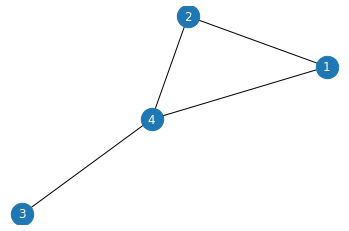

In [13]:
pos = nx.spring_layout(G);
nx.draw_networkx_labels(G, pos, font_color ='white');
nx.draw(G, pos = pos, node_size=500);

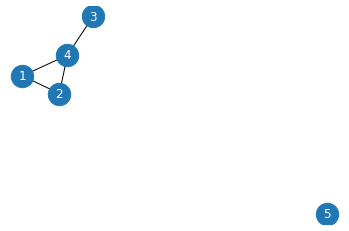

In [14]:
G.add_node(5)

pos = nx.spring_layout(G);
nx.draw_networkx_labels(G, pos, font_color ='white');
nx.draw(G, pos = pos, node_size=500);

In the previous cell, we added a 5th node, but didn't specify the link(s) connected to it. Thus, we can observe that the node is disconnected. 

In the next cell, let's add a link between the 4th and 5th nodes.

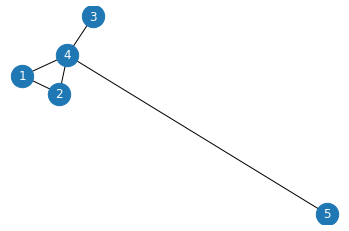

In [15]:
G.add_edge(4,5)

nx.draw_networkx_labels(G, pos, font_color ='white');
nx.draw(G, pos = pos, node_size=500);

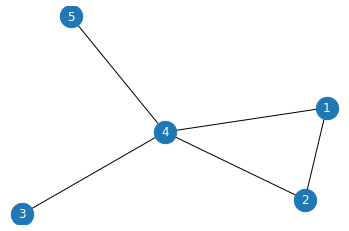

In [16]:
pos = nx.spring_layout(G);
nx.draw_networkx_labels(G, pos, font_color ='white');
nx.draw(G, pos = pos, node_size=500);

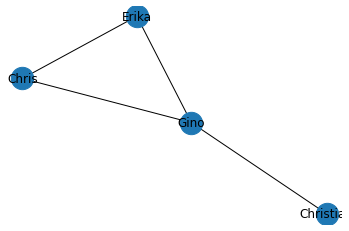

In [17]:
G = nx.Graph()

G.add_edge('Erika', 'Chris')
G.add_edge('Erika', 'Gino')
G.add_edge('Chris', 'Gino')
G.add_edge('Gino', 'Christian')

pos = nx.spring_layout(G);
nx.draw_networkx_labels(G, pos, font_color ='k');
nx.draw(G, pos = pos, node_size=500);

In [18]:
G.nodes()

NodeView(('Erika', 'Chris', 'Gino', 'Christian'))

In [19]:
G.add_node('Arielle')
G.nodes()

NodeView(('Erika', 'Chris', 'Gino', 'Christian', 'Arielle'))

Let's try removing nodes. Can we use an index in removing the nodes? Say, index 1?

In [20]:
try:
    G.remove_node(1)
except Exception as e: 
    print(e)
    
G.nodes()

The node 1 is not in the graph.


NodeView(('Erika', 'Chris', 'Gino', 'Christian', 'Arielle'))

To remove a node, we have to actually identify the node by its label/name. If this has not initially been introduced, the equivalent would be the numerical name.

In [21]:
G.remove_node('Arielle')
G.nodes()

NodeView(('Erika', 'Chris', 'Gino', 'Christian'))

It's easy to check the number of nodes and edges in the network.

Number of nodes:  4
Number of edges:  4


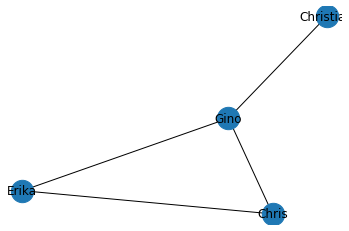

In [22]:
print ('Number of nodes: ', G.number_of_nodes())
print ('Number of edges: ', G.number_of_edges())

pos = nx.spring_layout(G);
nx.draw_networkx_labels(G, pos, font_color ='k');
nx.draw(G, pos = pos, node_size=500);

In [23]:
list(G.neighbors('Gino'))

['Erika', 'Chris', 'Christian']

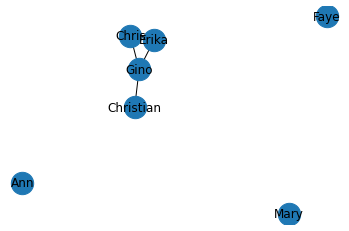

In [24]:
G.add_nodes_from(['Ann','Faye','Mary'])

pos = nx.spring_layout(G);
nx.draw_networkx_labels(G, pos, font_color ='k');
nx.draw(G, pos = pos, node_size=500);

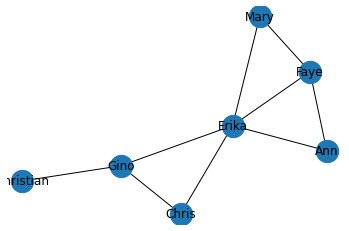

In [25]:
G.add_edges_from([('Ann', 'Erika'),
                  ('Ann', 'Faye'),
                  ('Faye', 'Mary'),
                  ('Erika', 'Mary'),
                  ('Erika', 'Faye')])

pos = nx.spring_layout(G);
nx.draw_networkx_labels(G, pos, font_color ='k');
nx.draw(G, pos = pos, node_size=500);

In [26]:
G.degree('Erika')

5

In [27]:
list(G.neighbors('Erika'))

['Chris', 'Gino', 'Ann', 'Mary', 'Faye']

### 3.2 Weighted Graphs and Other Edge Attributes

More often than not, in the real-world, links have weights. For example, there are certain friendships that are stronger than others. Another example is quantifying how often two individuals exchange emails at work. These "strengths" can be quantified by adding a weight attribute. In addition to the weight, we can also add other edge attributes as shown below where we added the attribute `relationship_type`, which could be "friends", "family", "professional", for example. 

In [28]:
G['Ann']['Faye']['weight'] = 8
G['Faye']['Mary']['weight'] = 10
G['Faye']['Mary']['relatioinship_type'] = 'friends'

In [29]:
G.edges(data=True)

EdgeDataView([('Erika', 'Chris', {}), ('Erika', 'Gino', {}), ('Erika', 'Ann', {}), ('Erika', 'Mary', {}), ('Erika', 'Faye', {}), ('Chris', 'Gino', {}), ('Gino', 'Christian', {}), ('Ann', 'Faye', {'weight': 8}), ('Faye', 'Mary', {'weight': 10, 'relatioinship_type': 'friends'})])

In [30]:
try: 
    G['Ann']['Mary']['weight'] = 5
except Exception as e:
    print (e)

'Mary'


In [31]:
G.add_edge('Ann', 'Mary', weight = 30)

In [32]:
G.add_edge('Ann', 'Mary', relatioinship_type = 'siblings')

In [33]:
G.edges(data=True)

EdgeDataView([('Erika', 'Chris', {}), ('Erika', 'Gino', {}), ('Erika', 'Ann', {}), ('Erika', 'Mary', {}), ('Erika', 'Faye', {}), ('Chris', 'Gino', {}), ('Gino', 'Christian', {}), ('Ann', 'Faye', {'weight': 8}), ('Ann', 'Mary', {'weight': 30, 'relatioinship_type': 'siblings'}), ('Faye', 'Mary', {'weight': 10, 'relatioinship_type': 'friends'})])

In [34]:
G.add_edge('Ann', 'Mary', friendship = 2)
G['Ann']['Faye']['friendship'] = 4
G.edges(data=True)

EdgeDataView([('Erika', 'Chris', {}), ('Erika', 'Gino', {}), ('Erika', 'Ann', {}), ('Erika', 'Mary', {}), ('Erika', 'Faye', {}), ('Chris', 'Gino', {}), ('Gino', 'Christian', {}), ('Ann', 'Faye', {'weight': 8, 'friendship': 4}), ('Ann', 'Mary', {'weight': 30, 'relatioinship_type': 'siblings', 'friendship': 2}), ('Faye', 'Mary', {'weight': 10, 'relatioinship_type': 'friends'})])

In the line below, we are saving the graphe to and edgelist file called `myG`.

In [35]:
nx.write_edgelist(G, 'myG')

<div class="alert alert-block alert-info">
<h4>Begin Hands-on</h4>
</div>

1. Build a weighted network `wG` of you and your LT-mates from Term 1 to Term 4.
2. Add an edge attribute called `term` which contains information on when that edge was first created. 
3. Add another edge attribute called `weight` which contains the number of times an edge existed in a term.
4. Visualize the network. Perform an EDA. 
5. What insights can we get from having this kind of network? What are the information do you think you can include in this type of analysis? And for what purpose?


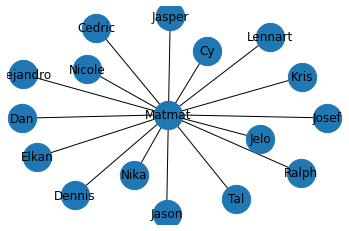

In [36]:
H = nx.Graph()

H.add_edge('Matmat', 'Nika')
H.add_edge('Matmat', 'Tal')
H.add_edge('Matmat', 'Ralph')
H.add_edge('Matmat', 'Kris')
H.add_edge('Matmat', 'Dan')

H.add_edge('Matmat', 'Cedric')
H.add_edge('Matmat', 'Jasper')
H.add_edge('Matmat', 'Josef')
H.add_edge('Matmat', 'Alejandro')
H.add_edge('Matmat', 'Nicole')

H.add_edge('Matmat', 'Jason')
H.add_edge('Matmat', 'Dennis')
H.add_edge('Matmat', 'Cy')

H.add_edge('Matmat', 'Elkan')
H.add_edge('Matmat', 'Jelo')
H.add_edge('Matmat', 'Lennart')

pos = nx.spring_layout(H);
nx.draw_networkx_labels(H, pos, font_color ='k');
nx.draw(H, pos = pos, node_size=800);



In [37]:
from itertools import combinations

In [38]:
t1 = ['Tal', 'Nika', 'Ralph', 'Kris', 'Dan']
for i in (list(combinations(t1, 2))):
    H.add_edge(i[0], i[1] )

In [39]:
t2 = ['Jasper', 'Nicole', 'Josef', 'Alejandro', 'Cedric']
for i in (list(combinations(t2, 2))):
    H.add_edge(i[0], i[1] )

In [40]:
t3 = ['Cy', 'Dennis', 'Jason']
for i in (list(combinations(t3, 2))):
    H.add_edge(i[0], i[1] )

In [41]:
t4 = ['Lennart', 'Elkan', 'Jelo']
for i in (list(combinations(t4, 2))):
    H.add_edge(i[0], i[1] )

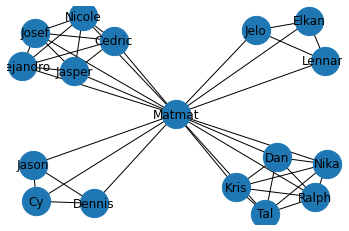

In [42]:
pos = nx.spring_layout(H);
nx.draw_networkx_labels(H, pos, font_color ='k');
nx.draw(H, pos = pos, node_size=800);

In [43]:
H['Matmat']['Nika']['term'] = 'first'
H['Matmat']['Tal']['term'] = 'first'
H['Matmat']['Ralph']['term'] = 'first'
H['Matmat']['Kris']['term'] = 'first'
H['Matmat']['Dan']['term'] = 'first'

H['Matmat']['Cedric']['term'] = 'second'
H['Matmat']['Josef']['term'] = 'second'
H['Matmat']['Jasper']['term'] = 'second'
H['Matmat']['Alejandro']['term'] = 'second'
H['Matmat']['Nicole']['term'] = 'second'

H['Matmat']['Dennis']['term'] = 'third'
H['Matmat']['Cy']['term'] = 'third'
H['Matmat']['Jason']['term'] = 'third'

H['Matmat']['Jelo']['term'] = 'fourth'
H['Matmat']['Lennart']['term'] = 'fourth'
H['Matmat']['Elkan']['term'] = 'fourth'


In [44]:
H['Matmat']['Nika']['weight'] = 14
H['Matmat']['Tal']['weight'] = 13
H['Matmat']['Ralph']['weight'] = 13
H['Matmat']['Kris']['weight'] = 11
H['Matmat']['Dan']['weight'] = 15

H['Matmat']['Cedric']['weight'] = 17
H['Matmat']['Josef']['weight'] = 17
H['Matmat']['Jasper']['weight'] = 17
H['Matmat']['Alejandro']['weight'] = 15
H['Matmat']['Nicole']['weight'] = 17

H['Matmat']['Dennis']['weight'] = 18
H['Matmat']['Cy']['weight'] = 18
H['Matmat']['Jason']['weight'] = 17

H['Matmat']['Jelo']['weight'] = 20
H['Matmat']['Lennart']['weight'] = 20
H['Matmat']['Elkan']['weight'] = 20


In [45]:
nx.write_edgelist(H, 'wG')

In [46]:
H

What I can observe is that as the term advances, I have gotten to interact more with my LTmates. In the first term there were lesser interactions since we just got to meet each other. In the fourth term, there were lots interactions between me and my now LTMates so the weight is bigger.

Though I cannot quantify friendship and easily say that all of these people are my friends, I can definitely see who I am more comfortable talking with.

<div class="alert alert-block alert-info">
<h4>End Hands-on</h4>
</div>

---

### 3.3 Directed Graphs

Many networks in the real-world are also directed. That is, the relationship between two entities has a particular direction. This directionality could represent, for example, who emailed whom, or who responded to whom on Twitter, or who follows whom on Twitter or TikTok, etc. 

In [47]:
dG = nx.DiGraph()

In [48]:
dG.add_edges_from([('Ann', 'Mary'), ('Mary', 'Ann')])

In [49]:
dG.add_weighted_edges_from([('Ann', 'Mary', 3), 
                            ('Mary', 'Ann', 2)])

In [50]:
dG.edges(data=True)

OutEdgeDataView([('Ann', 'Mary', {'weight': 3}), ('Mary', 'Ann', {'weight': 2})])

In [51]:
dG = nx.to_directed(G)

In [52]:
dG.edges(data=True)

OutEdgeDataView([('Erika', 'Chris', {}), ('Erika', 'Gino', {}), ('Erika', 'Ann', {}), ('Erika', 'Mary', {}), ('Erika', 'Faye', {}), ('Chris', 'Erika', {}), ('Chris', 'Gino', {}), ('Gino', 'Erika', {}), ('Gino', 'Chris', {}), ('Gino', 'Christian', {}), ('Christian', 'Gino', {}), ('Ann', 'Erika', {}), ('Ann', 'Faye', {'weight': 8, 'friendship': 4}), ('Ann', 'Mary', {'weight': 30, 'relatioinship_type': 'siblings', 'friendship': 2}), ('Faye', 'Ann', {'weight': 8, 'friendship': 4}), ('Faye', 'Mary', {'weight': 10, 'relatioinship_type': 'friends'}), ('Faye', 'Erika', {}), ('Mary', 'Faye', {'weight': 10, 'relatioinship_type': 'friends'}), ('Mary', 'Erika', {}), ('Mary', 'Ann', {'weight': 30, 'relatioinship_type': 'siblings', 'friendship': 2})])

### 3.4 Adjacency Matrix to NetworkX Graph
<div class="alert alert-block alert-info">
<b>Important:</b> Did you know that you can create a networkx graph from a numpy (adjacency) matrix?
</div>

In [53]:
nxG = nx.from_numpy_matrix(adj_G)
nxG.degree

DegreeView({0: 2, 1: 2, 2: 1, 3: 3})

In this new scheme, the node labels start at 0 such that in the drawing where Node 4 has degree 3, here in the networkx graph it is **Node 4 is Node 3** and it has degree 3.

## 4. Graph Properties

Now that we have constructed our graphs, how then do we describe them? This section provides some of the metrics to characterize network structures. 


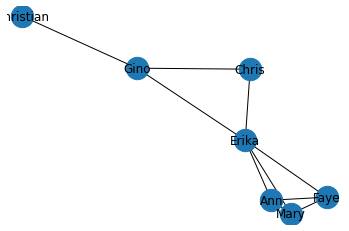

In [54]:
pos = nx.spring_layout(G);
nx.draw_networkx_labels(G, pos, font_color ='k');
nx.draw(G, pos = pos, node_size=500);

In [55]:
pos

{'Erika': array([ 0.10976304, -0.09677251]),
 'Chris': array([0.13170106, 0.53164365]),
 'Gino': array([-0.37199275,  0.54071773]),
 'Christian': array([-0.88126516,  1.        ]),
 'Ann': array([ 0.22617421, -0.62675479]),
 'Faye': array([ 0.47247246, -0.60048096]),
 'Mary': array([ 0.31314714, -0.74835311])}

### 4.1 Network Statistics

1. Size - total number of edges/links
2. Order - total number of vertices/nodes
3. Average degree

In [56]:
N = G.order()
L = G.size() 

avg_deg = float(L) / N 

print ('Nodes: ', N)
print ('Edges: ', L)
print ('Average degree: ', avg_deg)

Nodes:  7
Edges:  10
Average degree:  1.4285714285714286


### 4.2 Degree Distribution
The degree distribution, as the term implies, is the **probability distribution** of all node degrees over the entire network.

In [57]:
nx.degree(G)

DegreeView({'Erika': 5, 'Chris': 2, 'Gino': 3, 'Christian': 1, 'Ann': 3, 'Faye': 3, 'Mary': 3})

In [58]:
degrees = [k for node, k in nx.degree(G)]
print(degrees)

[5, 2, 3, 1, 3, 3, 3]


In [59]:
k_min = np.min(degrees)
k_max = np.max(degrees)
k_avg = np.mean(degrees)

print ('Minimum degree: ', k_min)
print ('Maximum degree: ', k_max)
print ('Average degree: ', k_avg)

Minimum degree:  1
Maximum degree:  5
Average degree:  2.857142857142857


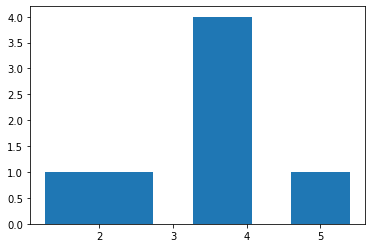

In [60]:
p, k = np.histogram([k for n,k in nx.degree(G)], bins = 6);
plt.bar(k[1:],p);

### 4.3 Shortest Paths

In [61]:
nx.average_shortest_path_length(G)

1.6666666666666667

In [62]:
nx.shortest_path(G, 'Erika', 'Mary')

['Erika', 'Mary']

In [63]:
nx.shortest_path(G, 'Mary', 'Gino')

['Mary', 'Erika', 'Gino']

In [64]:
nx.shortest_path_length(G, 'Mary', 'Gino')

2

In [65]:
nx.shortest_path_length(G, 'Mary', 'Christian')

3

In [66]:
list(nx.all_pairs_shortest_path_length(G))

[('Erika',
  {'Erika': 0,
   'Mary': 1,
   'Gino': 1,
   'Ann': 1,
   'Chris': 1,
   'Faye': 1,
   'Christian': 2}),
 ('Chris',
  {'Chris': 0,
   'Erika': 1,
   'Gino': 1,
   'Mary': 2,
   'Ann': 2,
   'Faye': 2,
   'Christian': 2}),
 ('Gino',
  {'Gino': 0,
   'Erika': 1,
   'Christian': 1,
   'Chris': 1,
   'Mary': 2,
   'Ann': 2,
   'Faye': 2}),
 ('Christian',
  {'Christian': 0,
   'Gino': 1,
   'Erika': 2,
   'Chris': 2,
   'Mary': 3,
   'Ann': 3,
   'Faye': 3}),
 ('Ann',
  {'Ann': 0,
   'Mary': 1,
   'Erika': 1,
   'Faye': 1,
   'Gino': 2,
   'Chris': 2,
   'Christian': 3}),
 ('Faye',
  {'Faye': 0,
   'Ann': 1,
   'Mary': 1,
   'Erika': 1,
   'Gino': 2,
   'Chris': 2,
   'Christian': 3}),
 ('Mary',
  {'Mary': 0,
   'Ann': 1,
   'Erika': 1,
   'Faye': 1,
   'Gino': 2,
   'Chris': 2,
   'Christian': 3})]

### 4.4 Clustering Coefficient

 <img src="figure/clust_coeff.png" width="75%">
 
The clustering coefficient essentially quantifies how ones "friends" are "friends" with each other.

In [67]:
nx.clustering(G, 'Erika')

0.4

In [68]:
nx.clustering(G, 'Faye')

1.0

In [69]:
cc = nx.clustering(G)
avg_clust = sum(cc.values()) / len(cc)
print(avg_clust)

0.6761904761904762


## 5. Exercises: Real-World Network

<div class="alert alert-block alert-info">
Perform the required analysis below and upload your work to Google colab. Submit to me a link to your Google colab via ALICE.
</div>

In [70]:
def net_prop(network):
    '''Display basic network properties of the network'''
    
    #Get number of nodes, edges, and number of degrees
    N = network.order()
    L = network.size() 
    avg_deg = float(L) / N 
    
    print ('Basic Properties')
    print ('Nodes: ', N)
    print ('Edges: ', L)
    print ('Average degree: ', avg_deg)
    print('\n')
    
    
    degrees = [degree for degree in nx.degree(network)]
    print("Sorted degrees of nodes")
    print(sorted(degrees, key = lambda x: x[1], reverse=True))
    

### 5.1 Zachary's Karate Club

Zachary, W. W. (1977), ‘An Information Flow Model for Conflict and Fission in Small Groups’, Journal of Anthropological Research 33, 452-473.

**Description** 

This is the well-known and much-used Zachary karate club network. The data was collected from the members of a university karate club by Wayne Zachary in 1977. Each node represents a member of the club, and each edge represents a tie between two members of the club.

In [71]:
K = nx.karate_club_graph()

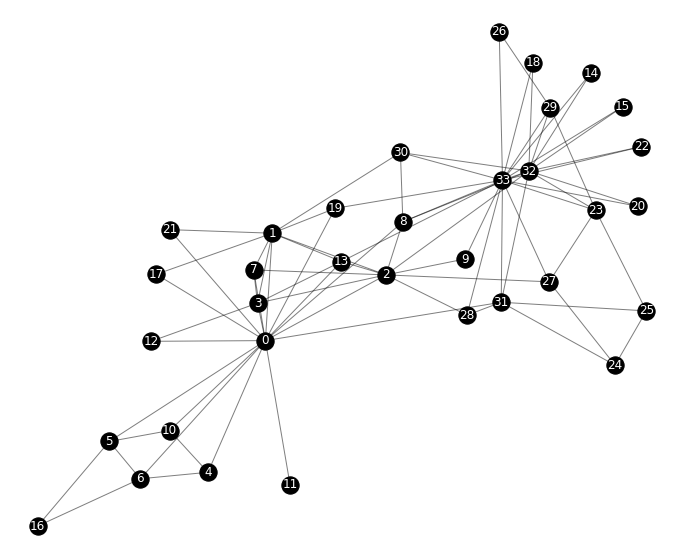

In [72]:
pos = nx.fruchterman_reingold_layout(K);

plt.figure(figsize=(12,10));
plt.axis("off");
nx.draw_networkx_nodes(K, pos, node_size=300, node_color="black");
nx.draw_networkx_edges(K, pos, alpha=0.500);
nx.draw_networkx_labels(K, pos, font_color="white");
plt.show();

#### 5.1.1 Network Structure Properties

In [73]:
pos

{0: array([-0.35536548, -0.22671724]),
 1: array([-0.33576022,  0.10384264]),
 2: array([-0.01416055, -0.02448366]),
 3: array([-0.37758564, -0.11134833]),
 4: array([-0.51790088, -0.6320386 ]),
 5: array([-0.79729103, -0.53725652]),
 6: array([-0.70954049, -0.65203806]),
 7: array([-0.38859573, -0.00922356]),
 8: array([0.03377016, 0.13887626]),
 9: array([0.20910407, 0.02441743]),
 10: array([-0.62627615, -0.50345268]),
 11: array([-0.28560629, -0.66970051]),
 12: array([-0.67892155, -0.22890034]),
 13: array([-0.14018128,  0.01661598]),
 14: array([0.56574385, 0.59669357]),
 15: array([0.65567016, 0.49306008]),
 16: array([-1.        , -0.79764764]),
 17: array([-0.66407345, -0.02267432]),
 18: array([0.40184284, 0.62775523]),
 19: array([-0.15804905,  0.18033013]),
 20: array([0.69908638, 0.18663206]),
 21: array([-0.62663414,  0.11482348]),
 22: array([0.70863925, 0.37038938]),
 23: array([0.57941846, 0.17433882]),
 24: array([ 0.63431309, -0.30239474]),
 25: array([ 0.72296304, -

In [74]:
net_prop(K)

Basic Properties
Nodes:  34
Edges:  78
Average degree:  2.2941176470588234


Sorted degrees of nodes
[(33, 17), (0, 16), (32, 12), (2, 10), (1, 9), (3, 6), (31, 6), (8, 5), (13, 5), (23, 5), (5, 4), (6, 4), (7, 4), (27, 4), (29, 4), (30, 4), (4, 3), (10, 3), (19, 3), (24, 3), (25, 3), (28, 3), (9, 2), (12, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (20, 2), (21, 2), (22, 2), (26, 2), (11, 1)]


In [75]:
list(nx.all_pairs_shortest_path_length(K))

[(0,
  {0: 0,
   1: 1,
   2: 1,
   3: 1,
   4: 1,
   5: 1,
   6: 1,
   7: 1,
   8: 1,
   10: 1,
   11: 1,
   12: 1,
   13: 1,
   17: 1,
   19: 1,
   21: 1,
   31: 1,
   9: 2,
   16: 2,
   24: 2,
   25: 2,
   27: 2,
   28: 2,
   30: 2,
   32: 2,
   33: 2,
   14: 3,
   15: 3,
   18: 3,
   20: 3,
   22: 3,
   23: 3,
   26: 3,
   29: 3}),
 (1,
  {1: 0,
   0: 1,
   2: 1,
   3: 1,
   7: 1,
   13: 1,
   17: 1,
   19: 1,
   21: 1,
   30: 1,
   4: 2,
   5: 2,
   6: 2,
   8: 2,
   9: 2,
   10: 2,
   11: 2,
   12: 2,
   27: 2,
   28: 2,
   31: 2,
   32: 2,
   33: 2,
   14: 3,
   15: 3,
   16: 3,
   18: 3,
   20: 3,
   22: 3,
   23: 3,
   24: 3,
   25: 3,
   26: 3,
   29: 3}),
 (2,
  {2: 0,
   0: 1,
   1: 1,
   32: 1,
   3: 1,
   7: 1,
   8: 1,
   9: 1,
   13: 1,
   27: 1,
   28: 1,
   4: 2,
   5: 2,
   6: 2,
   10: 2,
   11: 2,
   12: 2,
   14: 2,
   15: 2,
   17: 2,
   18: 2,
   19: 2,
   20: 2,
   21: 2,
   22: 2,
   23: 2,
   24: 2,
   29: 2,
   30: 2,
   31: 2,
   33: 2,
   16: 3,
   25: 3,
 

#### 5.1.2 Network Insights

1. There two clusters/groups of people, probably two sections of classes. 
2. For section 1, `0` is the central node. For section 2, `33` is the central node based on the number of degrees they have. My theory is that both these people are the teachers or presidents for each section respectively.
3. With an average degree of `2.3`, this tells us that there is a great chance that everyone knows each other in this club.  
4. This network is a perfect example of detecting a community, even within a small group of people.

### 5.2 Davis Southern women social network

Vladimir Batagelj and Andrej Mrvar (2006): Pajek datasets
http://vlado.fmf.uni-lj.si/pub/networks/data/. 

**Description**

This is a data set of 18 women observed over a nine-month period. During that period, various subsets of these women met in a series of 14 informal social events. The data recored which women met for which events.

In [76]:
DS = nx.davis_southern_women_graph()

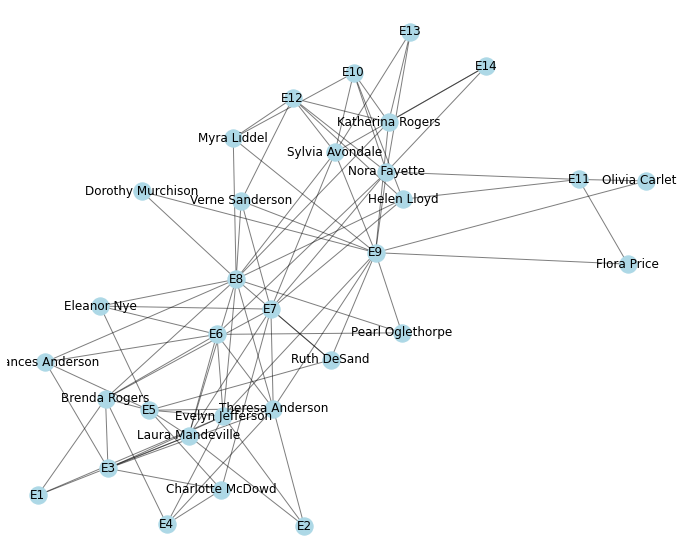

In [77]:
pos = nx.fruchterman_reingold_layout(DS);

plt.figure(figsize=(12,10));
plt.axis("off");
nx.draw_networkx_nodes(DS, pos, node_size=300, node_color="lightblue");
nx.draw_networkx_edges(DS, pos, alpha=0.500);
nx.draw_networkx_labels(DS, pos, font_color='black');
plt.show();


#### 5.2.1 Network Structure Properties

In [78]:
pos

{'Evelyn Jefferson': array([-0.18117496, -0.50702893]),
 'Laura Mandeville': array([-0.27506033, -0.58445272]),
 'Theresa Anderson': array([-0.04555394, -0.4775424 ]),
 'Brenda Rogers': array([-0.50076508, -0.43855187]),
 'Charlotte McDowd': array([-0.18644226, -0.79584017]),
 'Frances Anderson': array([-0.66389084, -0.29475977]),
 'Eleanor Nye': array([-0.51526614, -0.07548414]),
 'Pearl Oglethorpe': array([ 0.30353147, -0.18012646]),
 'Ruth DeSand': array([ 0.10992933, -0.28658119]),
 'Verne Sanderson': array([-0.1325478 ,  0.33683189]),
 'Myra Liddel': array([-0.15412738,  0.58273402]),
 'Katherina Rogers': array([0.26750867, 0.64601156]),
 'Sylvia Avondale': array([0.12193788, 0.52737952]),
 'Nora Fayette': array([0.26183028, 0.45073033]),
 'Helen Lloyd': array([0.3061614 , 0.34376326]),
 'Dorothy Murchison': array([-0.40279656,  0.37440552]),
 'Olivia Carleton': array([0.96720549, 0.41559082]),
 'Flora Price': array([0.9169105 , 0.08925022]),
 'E1': array([-0.68501398, -0.81784915

In [79]:
net_prop(DS)

Basic Properties
Nodes:  32
Edges:  89
Average degree:  2.78125


Sorted degrees of nodes
[('E8', 14), ('E9', 12), ('E7', 10), ('Evelyn Jefferson', 8), ('Theresa Anderson', 8), ('Nora Fayette', 8), ('E5', 8), ('E6', 8), ('Laura Mandeville', 7), ('Brenda Rogers', 7), ('Sylvia Avondale', 7), ('Katherina Rogers', 6), ('E3', 6), ('E12', 6), ('Helen Lloyd', 5), ('E10', 5), ('Charlotte McDowd', 4), ('Frances Anderson', 4), ('Eleanor Nye', 4), ('Ruth DeSand', 4), ('Verne Sanderson', 4), ('Myra Liddel', 4), ('E4', 4), ('E11', 4), ('Pearl Oglethorpe', 3), ('E1', 3), ('E2', 3), ('E13', 3), ('E14', 3), ('Dorothy Murchison', 2), ('Olivia Carleton', 2), ('Flora Price', 2)]


In [80]:
nx.average_shortest_path_length(DS)

2.306451612903226

#### 5.2.2 Network Insights

1. Assuming that the 18 women in the experiment don't know each other, this network showed that they met each other or at least met someone who knows someone from the experimental group.
2. Since this experiment is observed in through gathering of informal events, if each of these women would be in at least (less than or equal to) 3 distinct social groups.
3. Unlike the previous network we analyzed, this network doesn't seem to have a central node, indicating that these women have interacted with each other inside a small community that doesn't seem to know each other in the first place.
4. Woman `E8` has interacted and engaged the most number of women in the network.

### 5.3 Florentine families

- Breiger R. and Pattison P. (1986). Cumulated social roles: The duality of persons and their algebras. Social Networks, 8, 215-256.
- Padgett, John F. 1994. Marriage and Elite Structure in Renaissance Florence, 1282-1500. Paper delivered to the Social Science History Association. 

**Description** 

This is a data set of marriage and business ties among Renaissance Florentine families.

In [81]:
florentine = nx.florentine_families_graph() 

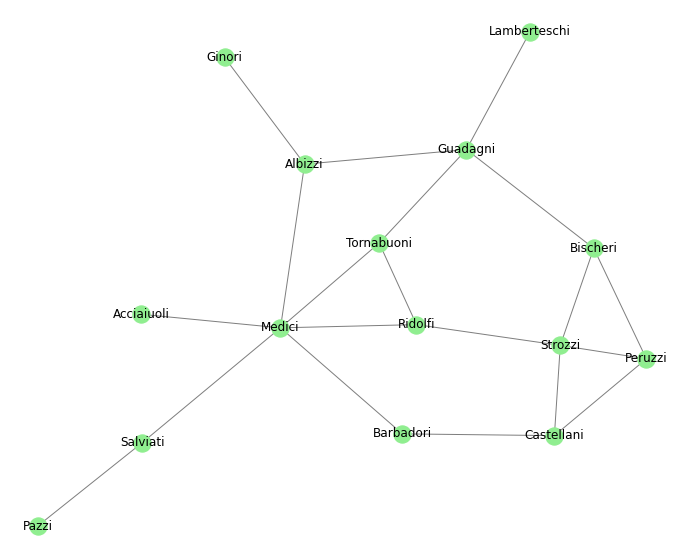

In [82]:
pos = nx.fruchterman_reingold_layout(florentine);

plt.figure(figsize=(12,10));
plt.axis("off");
nx.draw_networkx_nodes(florentine, pos, node_size=300, node_color="lightgreen");
nx.draw_networkx_edges(florentine, pos, alpha=0.500);
nx.draw_networkx_labels(florentine, pos, font_color='black');
plt.show();


#### 5.3.1 Network Structure Properties

In [83]:
pos

{'Acciaiuoli': array([-0.6954995 , -0.06894589]),
 'Medici': array([-0.28795201, -0.11384842]),
 'Castellani': array([ 0.51518459, -0.47204673]),
 'Peruzzi': array([ 0.78486672, -0.21677909]),
 'Strozzi': array([ 0.53251164, -0.17213146]),
 'Barbadori': array([ 0.06938677, -0.46614892]),
 'Ridolfi': array([ 0.11086289, -0.10319046]),
 'Tornabuoni': array([0.00145699, 0.16795784]),
 'Albizzi': array([-0.21724236,  0.42989899]),
 'Salviati': array([-0.69304307, -0.49514859]),
 'Pazzi': array([-1.        , -0.77262107]),
 'Bischeri': array([0.63062694, 0.15034942]),
 'Guadagni': array([0.25734671, 0.47853349]),
 'Ginori': array([-0.45200756,  0.78468366]),
 'Lamberteschi': array([0.44350124, 0.86943723])}

In [84]:
net_prop(florentine)

Basic Properties
Nodes:  15
Edges:  20
Average degree:  1.3333333333333333


Sorted degrees of nodes
[('Medici', 6), ('Strozzi', 4), ('Guadagni', 4), ('Castellani', 3), ('Peruzzi', 3), ('Ridolfi', 3), ('Tornabuoni', 3), ('Albizzi', 3), ('Bischeri', 3), ('Barbadori', 2), ('Salviati', 2), ('Acciaiuoli', 1), ('Pazzi', 1), ('Ginori', 1), ('Lamberteschi', 1)]


#### 5.3.2 Network Insights

1. `Medici` Family seemed to be the most powerful and most influential. It has the most connections and most of Medici's connection have at least 1 or 2 families under it.
2. There are no direct connections between `Guagdani` and `Medici`. Looking at the network, I could hypothesize that these two families are enemies, with `Guagdani` getting a hold of influential families like `Tornabuoni` and `Strozzi`. But `Medici` got a hold of more families that are linked to more families in the network, thus becoming a stronghold within this network.

### 5.4 MSDS 2020 Hangout Network
The MSDS 2020 Hangout Network was generated in class on 06 February 2020. The instruction given to the students was:

*"Who among your classmates do you most frequently hangout with [not necessarily for classwork] (choose 3 to 8)? Alternatively, who are those you enjoy hanging out with the most?"*

The dataset is anonymized.

#### 5.4.1 Network Structure Properties

In [85]:
msds = nx.read_gpickle('class-map.pkl')
G = nx.Graph(msds)

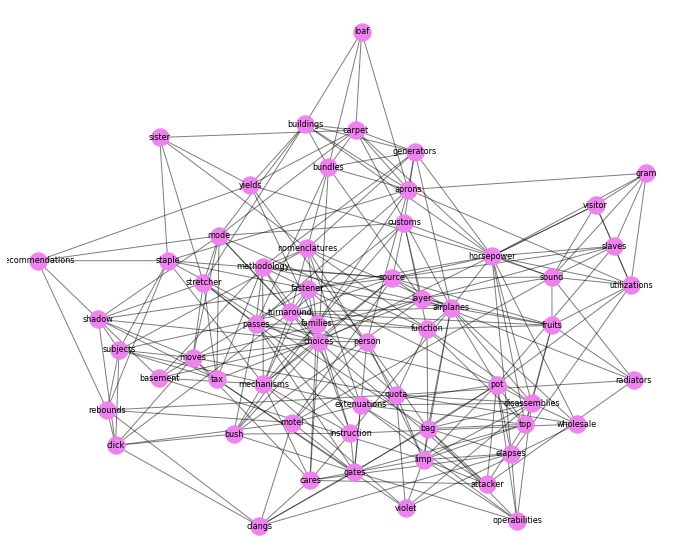

In [86]:
pos = nx.fruchterman_reingold_layout(G);
plt.figure(figsize=(12,10));
plt.axis("off");
nx.draw_networkx_nodes(G, pos, node_size=300, node_color="violet");
nx.draw_networkx_edges(G, pos, alpha=0.500);
nx.draw_networkx_labels(G, pos, font_color='black', font_size = 8);

In [87]:
net_prop(G)

Basic Properties
Nodes:  59
Edges:  285
Average degree:  4.830508474576271


Sorted degrees of nodes
[('choices', 19), ('horsepower', 16), ('airplanes', 16), ('source', 14), ('pot', 14), ('limp', 13), ('turnaround', 13), ('disassemblies', 13), ('fastener', 12), ('bag', 12), ('mechanisms', 12), ('families', 12), ('methodology', 11), ('extenuations', 11), ('aprons', 11), ('function', 11), ('mode', 11), ('gates', 11), ('sound', 11), ('nomenclatures', 11), ('moves', 10), ('quota', 10), ('top', 10), ('layer', 10), ('fruits', 10), ('carpet', 10), ('passes', 10), ('generators', 9), ('stretcher', 9), ('clangs', 9), ('instruction', 9), ('buildings', 9), ('bundles', 9), ('cares', 9), ('person', 9), ('staple', 9), ('utilizations', 9), ('tax', 9), ('subjects', 9), ('slaves', 8), ('bush', 8), ('click', 8), ('shadow', 8), ('elapses', 8), ('attacker', 8), ('customs', 8), ('motel', 8), ('rebounds', 7), ('yields', 7), ('recommendations', 7), ('operabilities', 7), ('loaf', 6), ('wholesale', 6), ('baseme

#### 5.3.2 Network Insights

In [88]:
import pandas as pd
import seaborn as sns

In [89]:
deg = nx.degree_centrality(G)
bet = nx.betweenness_centrality(G)

In [90]:
degrees = [k for node, k in nx.degree(G)]

In [91]:
df = pd.DataFrame.from_dict([deg, bet]).T
df.columns = ['Degree Centrality', 'Betweenes Centrality']
# df['Connections'] = degrees 

In [92]:
for col in df.columns:
    df[col] = df[col] / max(df[col])

In [93]:
top_df = df

In [94]:
top_df = top_df.sort_values("Degree Centrality", ascending=False)[:10]
top_df = pd.DataFrame(top_df.stack())
top_df = top_df.reset_index()
top_df.columns = ["Name", "Parameter", "Value"]

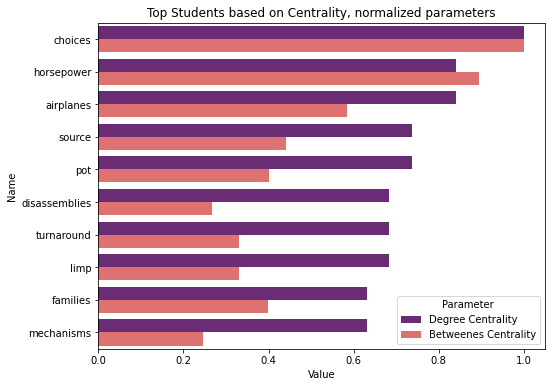

In [95]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(x="Value", y="Name", data=top_df, hue="Parameter", palette="magma")

plt.title("Top Students based on Centrality, normalized parameters")
plt.show()

1. `Choices` has the highest degree of centrality. This could be an indication that he/she has high influence in the class. Could be the most friendly or the class president. 
2. The top 10 students with high centrality also are the top 10 in terms of degree connections.
3. Average degree is at around `5`. This maybe attributed to the existence of the learning team groupings with at least 4 to 6 members.